In [7]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # for reproducibility
X = np.random.rand(100, 1)*5  # 100 data points between 0 and 1
y = (X > 2).astype(int)  # Binary target variable

In [8]:
X

array([[2.74406752],
       [3.57594683],
       [3.01381688],
       [2.72441591],
       [2.118274  ],
       [3.22947057],
       [2.18793606],
       [4.458865  ],
       [4.8183138 ],
       [1.91720759],
       [3.95862519],
       [2.6444746 ],
       [2.84022281],
       [4.62798319],
       [0.35518029],
       [0.4356465 ],
       [0.10109199],
       [4.16309923],
       [3.89078375],
       [4.35006074],
       [4.89309171],
       [3.99579282],
       [2.30739681],
       [3.90264588],
       [0.59137213],
       [3.19960511],
       [0.71676644],
       [4.72334459],
       [2.60924161],
       [2.0733097 ],
       [1.32277806],
       [3.87116845],
       [2.28075166],
       [2.84216974],
       [0.093949  ],
       [3.08817749],
       [3.06047861],
       [3.08466998],
       [4.71874039],
       [3.4091015 ],
       [1.7975395 ],
       [2.18515977],
       [3.48815598],
       [0.30112736],
       [3.33383358],
       [3.35318935],
       [1.05191281],
       [0.644

In [9]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [10]:

# Logistic Regression Model Class
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Number of training examples and features
        self.m, self.n = X.shape
        # Initialize weights (a) and bias (b) to zero
        self.a = np.zeros((self.n, 1))
        self.b = 0
        # Placeholder for cost history
        self.cost_history = []

        # Gradient Descent
        for i in range(self.iterations):
            # Linear combination
            z = np.dot(X, self.a) + self.b
            # Prediction
            h = self.sigmoid(z) # Add the sigmoid function

            # Cost function: Binary Cross-Entropy Loss
            cost = (-1 / self.m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) # Change to binary cross-entropy loss
            self.cost_history.append(cost)

            # Gradients
            da = (1 / self.m) * np.dot(X.T, (h - y))
            db = (1 / self.m) * np.sum(h - y)

            # Update weights and bias
            self.a -= self.learning_rate * da
            self.b -= self.learning_rate * db
            
            print(f'Iteration: {i}, Cost: {cost}, a: {self.a}, b: {self.b}')

        return self

    def predict(self, X):
        # Predicting the output for given input X
        z = np.dot(X, self.a) + self.b
        return self.sigmoid(z)

    def predict_classes(self, X, threshold=0.5):
        # Predicting binary class labels based on the threshold
        probabilities = self.predict(X)
        return (probabilities >= threshold).astype(int)


In [11]:
# Hyperparameters
learning_rate = 0.01
iterations = 1000

# Training the model
# Add a column of ones to include the bias term (intercept) in the model
X_b = np.c_[np.ones((100, 1)), X]

# Initialize and train the logistic regression model
model = LogisticRegressionFromScratch(learning_rate, iterations)
model.fit(X_b, y)


Iteration: 0, Cost: 0.6931471805599453, a: [[0.0009    ]
 [0.00820622]], b: 0.0009
Iteration: 1, Cost: 0.6863246388031436, a: [[0.00174701]
 [0.01624454]], b: 0.0017470057283708773
Iteration: 2, Cost: 0.6797899883493941, a: [[0.0025423 ]
 [0.02411889]], b: 0.002542296563298591
Iteration: 3, Cost: 0.6735299960176667, a: [[0.00328714]
 [0.03183318]], b: 0.0032871416125137124
Iteration: 4, Cost: 0.6675319219018029, a: [[0.0039828 ]
 [0.03939131]], b: 0.003982797060518794
Iteration: 5, Cost: 0.6617835210274344, a: [[0.0046305 ]
 [0.04679713]], b: 0.004630503834038988
Iteration: 6, Cost: 0.6562730416582688, a: [[0.00523149]
 [0.05405445]], b: 0.005231485567711305
Iteration: 7, Cost: 0.6509892207142676, a: [[0.00578695]
 [0.06116703]], b: 0.005786946850899172
Iteration: 8, Cost: 0.6459212767328711, a: [[0.00629807]
 [0.06813858]], b: 0.006298071735888305
Iteration: 9, Cost: 0.6410589007705825, a: [[0.00676602]
 [0.07497274]], b: 0.006766022487509696
Iteration: 10, Cost: 0.6363922456072341, a

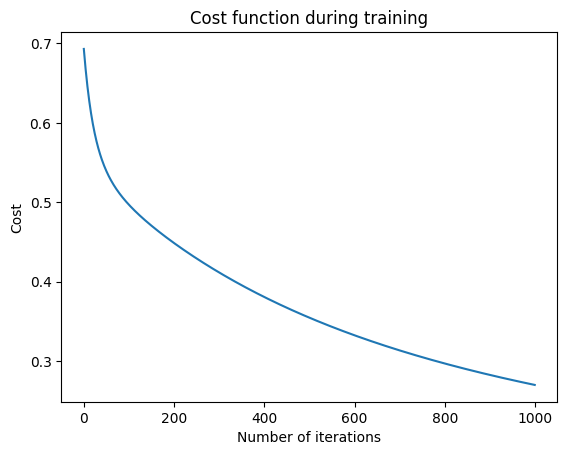

In [12]:
# Plotting the cost function
plt.plot(range(iterations), model.cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost function during training')
plt.show()

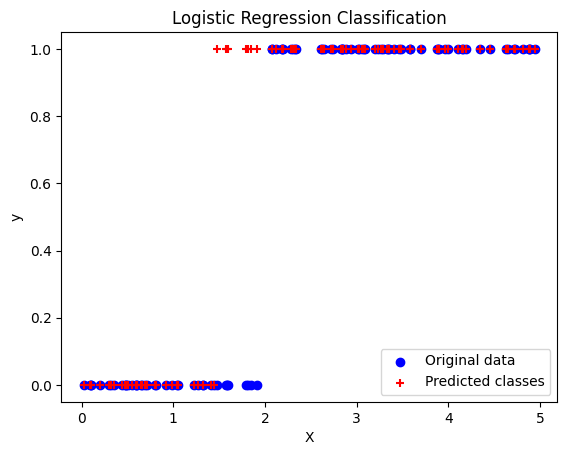

In [13]:

# Making predictions
# Predicting on the training data
y_pred_prob = model.predict(X_b)
y_pred_class = model.predict_classes(X_b)

# Plotting the results
plt.scatter(X, y, color='blue', label='Original data')
plt.scatter(X, y_pred_class, color='red', label='Predicted classes', marker='+')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression Classification')
plt.legend()
plt.show()